In [42]:
#Requisite Scikit-Learn packages
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Visualisation and Computation packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [43]:
# Data Source - http://ww2.amstat.org/publications/jse/jse_data_archive.htm
fish_measurements = np.array([[242.,23.2,25.4,30.,38.4,13.4], [290.,24.,26.3,31.2,40.,13.8], [340.,23.9,26.5,31.1,39.8,15.1], [363.,26.3,29.,33.5,38.,13.3], [430.,26.5,29.,34.,36.6,15.1], [450.,26.8,29.7,34.7,39.2,14.2], [500.,26.8,29.7,34.5,41.1,15.3], [390.,27.6,30.,35.,36.2,13.4], [450.,27.6,30.,35.1,39.9,13.8], [500.,28.5,30.7,36.2,39.3,13.7], [475.,28.4,31.,36.2,39.4,14.1], [500.,28.7,31.,36.2,39.7,13.3], [500.,29.1,31.5,36.4,37.8,12. ], [600.,29.4,32.,37.2,40.2,13.9], [600.,29.4,32.,37.2,41.5,15. ], [700.,30.4,33.,38.3,38.8,13.8], [700.,30.4,33.,38.5,38.8,13.5], [610.,30.9,33.5,38.6,40.5,13.3], [650.,31.,33.5,38.7,37.4,14.8], [575.,31.3,34.,39.5,38.3,14.1], [685.,31.4,34.,39.2,40.8,13.7], [620.,31.5,34.5,39.7,39.1,13.3], [680.,31.8,35.,40.6,38.1,15.1], [700.,31.9,35.,40.5,40.1,13.8], [725.,31.8,35.,40.9,40.,14.8], [720.,32.,35.,40.6,40.3,15. ], [714.,32.7,36.,41.5,39.8,14.1], [850.,32.8,36.,41.6,40.6,14.9], [1000.,33.5,37.,42.6,44.5,15.5], [920.,35.,38.5,44.1,40.9,14.3], [955.,35.,38.5,44.,41.1,14.3], [925.,36.2,39.5,45.3,41.4,14.9], [975.,37.4,41.,45.9,40.6,14.7], [950.,38.,41.,46.5,37.9,13.7], [40.,12.9,14.1,16.2,25.6,14. ], [69.,16.5,18.2,20.3,26.1,13.9], [78.,17.5,18.8,21.2,26.3,13.7], [87.,18.2,19.8,22.2,25.3,14.3], [120.,18.6,20.,22.2,28.,16.1], [0.,19.,20.5,22.8,28.4,14.7], [110.,19.1,20.8,23.1,26.7,14.7], [120.,19.4,21.,23.7,25.8,13.9], [150.,20.4,22.,24.7,23.5,15.2], [145.,20.5,22.,24.3,27.3,14.6], [160.,20.5,22.5,25.3,27.8,15.1], [140.,21.,22.5,25.,26.2,13.3], [160.,21.1,22.5,25.,25.6,15.2], [169.,22.,24.,27.2,27.7,14.1], [161.,22.,23.4,26.7,25.9,13.6], [200.,22.1,23.5,26.8,27.6,15.4], [180.,23.6,25.2,27.9,25.4,14. ], [290.,24.,26.,29.2,30.4,15.4], [272.,25.,27.,30.6,28.,15.6], [390.,29.5,31.7,35.,27.1,15.3], [6.7, 9.3, 9.8,10.8,16.1, 9.7], [7.5,10.,10.5,11.6,17.,10. ], [7.,10.1,10.6,11.6,14.9, 9.9], [9.7,10.4,11.,12.,18.3,11.5], [9.8,10.7,11.2,12.4,16.8,10.3], [8.7,10.8,11.3,12.6,15.7,10.2], [10.,11.3,11.8,13.1,16.9, 9.8], [9.9,11.3,11.8,13.1,16.9, 8.9], [9.8,11.4,12.,13.2,16.7, 8.7], [12.2,11.5,12.2,13.4,15.6,10.4], [13.4,11.7,12.4,13.5,18., 9.4], [12.2,12.1,13.,13.8,16.5, 9.1], [19.7,13.2,14.3,15.2,18.9,13.6], [19.9,13.8,15.,16.2,18.1,11.6], [200.,30.,32.3,34.8,16., 9.7], [300.,31.7,34.,37.8,15.1,11. ], [300.,32.7,35.,38.8,15.3,11.3], [300.,34.8,37.3,39.8,15.8,10.1], [430.,35.5,38.,40.5,18.,11.3], [345.,36.,38.5,41.,15.6, 9.7], [456.,40.,42.5,45.5,16., 9.5], [510.,40.,42.5,45.5,15., 9.8], [540.,40.1,43.,45.8,17.,11.2], [500.,42.,45.,48.,14.5,10.2], [567.,43.2,46.,48.7,16.,10. ], [770.,44.8,48.,51.2,15.,10.5], [950.,48.3,51.7,55.1,16.2,11.2], [1250.,52.,56.,59.7,17.9,11.7], [1600.,56.,60.,64.,15., 9.6], [1550.,56.,60.,64.,15., 9.6], [1650.,59.,63.4,68.,15.9,11. ]])

species = ['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 'Pike']


In [44]:
# Instantiating a scaler and KMeans
scaler = StandardScaler()
kmeans = KMeans(n_clusters = 4)

# Instantiating pipeline chaining scaler and kmeans
pipeline = make_pipeline(scaler, kmeans)

In [45]:
pipeline.fit(fish_measurements)

# Cluster labels
labels = pipeline.predict(fish_measurements)
print (labels)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 3 3 3 3 3 3 3 3 3 3 3 3 1 3 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2]


In [46]:
# Instantiating a dataframe with columns as labels and species
df = pd.DataFrame({'labels': labels, 'species': species})

# Instantiating crosstab
ct = pd.crosstab(df['labels'], df['species'])

# Displaying crosstab
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0           33     0      1      0
1            1     0     19      1
2            0    17      0      0
3            0     0      0     13


# Understanding the PCA Variance features

In [47]:
scaler = StandardScaler() #Instantiating scaler
pca = PCA() #Instantiating PCA

pipeline = make_pipeline(scaler, pca) #Chaining pca and scaler to the pipeline

pipeline.fit(fish_measurements) #Fitting the pipeline on the measurement data

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

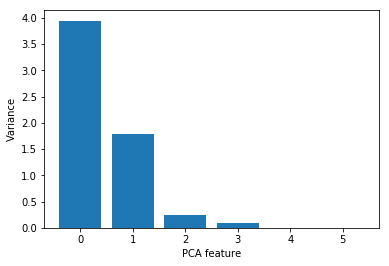

In [48]:
# Plotting the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.show()

# Reducing dimensions of the fish measurements using PCA

In [49]:
scaled_measurements = np.array([[-0.50109735, -0.36878558, -0.34323399, -0.23781518,  1.0032125 , 0.25373964],
       [-0.37434344, -0.29750241, -0.26893461, -0.14634781,  1.15869615, 0.44376493],
       [-0.24230812, -0.30641281, -0.25242364, -0.15397009,  1.13926069, 1.0613471 ],
       [-0.18157187, -0.09256329, -0.04603648,  0.02896467,  0.96434159, 0.20623332],
       [-0.00464454, -0.0747425 , -0.04603648,  0.06707608,  0.8282934 , 1.0613471 ],
       [ 0.04816959, -0.04801131,  0.01175193,  0.12043205,  1.08095432, 0.63379021],
       [ 0.18020491, -0.04801131,  0.01175193,  0.10518748,  1.26559115, 1.15635974],
       [-0.11027279,  0.02327186,  0.03651839,  0.14329889,  0.78942248, 0.25373964],
       [ 0.04816959,  0.02327186,  0.03651839,  0.15092117,  1.14897842, 0.44376493],
       [ 0.18020491,  0.10346543,  0.09430679,  0.23476627,  1.09067205, 0.39625861],
       [ 0.11418725,  0.09455503,  0.11907325,  0.23476627,  1.10038978, 0.58628389],
       [ 0.18020491,  0.12128622,  0.11907325,  0.23476627,  1.12954296, 0.20623332],
       [ 0.18020491,  0.1569278 ,  0.16035069,  0.25001083,  0.94490613, -0.41134885],
       [ 0.44427556,  0.18365899,  0.20162812,  0.31098909,  1.1781316 , 0.49127125],
       [ 0.44427556,  0.18365899,  0.20162812,  0.31098909,  1.30446206, 1.01384078],
       [ 0.7083462 ,  0.27276296,  0.28418298,  0.39483418,  1.04208341, 0.44376493],
       [ 0.7083462 ,  0.27276296,  0.28418298,  0.41007875,  1.04208341, 0.30124596],
       [ 0.47068262,  0.31731494,  0.32546042,  0.41770103,  1.20728478, 0.20623332],
       [ 0.57631088,  0.32622533,  0.32546042,  0.42532331,  0.90603522, 0.91882813],
       [ 0.3782579 ,  0.35295652,  0.36673785,  0.48630156,  0.99349477, 0.58628389],
       [ 0.66873561,  0.36186692,  0.36673785,  0.46343472,  1.23643797, 0.39625861],
       [ 0.49708969,  0.37077732,  0.40801528,  0.50154612,  1.07123659, 0.20623332],
       [ 0.65553208,  0.3975085 ,  0.44929271,  0.57014666,  0.97405931, 1.0613471 ],
       [ 0.7083462 ,  0.4064189 ,  0.44929271,  0.56252438,  1.16841387, 0.44376493],
       [ 0.77436387,  0.3975085 ,  0.44929271,  0.5930135 ,  1.15869615, 0.91882813],
       [ 0.76116033,  0.4153293 ,  0.44929271,  0.57014666,  1.18784933, 1.01384078],
       [ 0.74531609,  0.47770207,  0.53184758,  0.63874719,  1.13926069, 0.58628389],
       [ 1.10445217,  0.48661247,  0.53184758,  0.64636947,  1.21700251, 0.96633446],
       [ 1.50055814,  0.54898524,  0.61440245,  0.72259229,  1.5959939 , 1.25137238],
       [ 1.28930162,  0.68264119,  0.73823474,  0.83692651,  1.2461557 , 0.68129653],
       [ 1.38172635,  0.68264119,  0.73823474,  0.82930423,  1.26559115, 0.68129653],
       [ 1.30250516,  0.78956594,  0.82078961,  0.92839389,  1.29474434, 0.96633446],
       [ 1.43454048,  0.8964907 ,  0.94462191,  0.97412758,  1.21700251, 0.87132181],
       [ 1.36852282,  0.94995308,  0.94462191,  1.01986127,  0.95462386, 0.39625861],
       [-1.03452005, -1.2865564 , -1.27610397, -1.28969003, -0.24065667, 0.53877757],
       [-0.95793956, -0.96578213, -0.93762902, -0.97717649, -0.19206803, 0.49127125],
       [-0.93417321, -0.87667817, -0.8880961 , -0.90857596, -0.17263258, 0.39625861],
       [-0.91040685, -0.8143054 , -0.80554124, -0.83235314, -0.26980986, 0.68129653],
       [-0.82326354, -0.77866381, -0.78903027, -0.83235314, -0.0074312 , 1.5364103 ],
       [-1.14014831, -0.74302223, -0.74775283, -0.78661945,  0.03143971, 0.87132181],
       [-0.8496706 , -0.73411183, -0.72298637, -0.76375261, -0.13376167, 0.87132181],
       [-0.82326354, -0.70738064, -0.7064754 , -0.71801892, -0.22122122, 0.49127125],
       [-0.74404234, -0.61827668, -0.62392054, -0.6417961 , -0.44472896, 1.10885342],
       [-0.75724587, -0.60936628, -0.62392054, -0.67228523, -0.0754553 , 0.82381549],
       [-0.71763528, -0.60936628, -0.5826431 , -0.59606241, -0.02686666, 1.0613471 ],
       [-0.77044941, -0.5648143 , -0.5826431 , -0.61892926, -0.18235031, 0.20623332],
       [-0.71763528, -0.5559039 , -0.5826431 , -0.61892926, -0.24065667, 1.10885342],
       [-0.69386892, -0.47571034, -0.4588108 , -0.45123907, -0.03658439, 0.58628389],
       [-0.71499457, -0.47571034, -0.50834372, -0.48935047, -0.21150349, 0.34875228],
       [-0.61200702, -0.46679994, -0.50008824, -0.48172819, -0.04630212, 1.20386606],
       [-0.66482115, -0.33314399, -0.35974497, -0.39788309, -0.26009213, 0.53877757],
       [-0.37434344, -0.29750241, -0.29370107, -0.29879344,  0.22579427, 1.20386606],
       [-0.42187616, -0.20839845, -0.21114621, -0.19208149, -0.0074312 , 1.2988787 ],
       [-0.11027279,  0.19256939,  0.17686166,  0.14329889, -0.09489075, 1.15635974],
       [-1.12245558, -1.60733067, -1.63108989, -1.70129323, -1.16384082, -1.50399423],
       [-1.12034301, -1.5449579 , -1.57330149, -1.64031498, -1.07638127, -1.36147526],
       [-1.12166336, -1.5360475 , -1.565046  , -1.64031498, -1.28045356, -1.40898159],
       [-1.11453346, -1.50931631, -1.53202405, -1.60982586, -0.95005081, -0.64888045],
       [-1.11426939, -1.48258512, -1.51551308, -1.57933673, -1.09581673, -1.2189563 ],
       [-1.11717416, -1.47367473, -1.5072576 , -1.56409217, -1.20271174, -1.26646262],
       [-1.11374125, -1.42912274, -1.46598016, -1.52598076, -1.086099  , -1.45648791],
       [-1.11400532, -1.42912274, -1.46598016, -1.52598076, -1.086099  , -1.88404479],
       [-1.11426939, -1.42021235, -1.44946919, -1.51835848, -1.10553446, -1.97905744],
       [-1.10793169, -1.41130195, -1.43295822, -1.50311391, -1.21242946, -1.17144998],
       [-1.10476284, -1.39348116, -1.41644724, -1.49549163, -0.97920399, -1.64651319],
       [-1.10793169, -1.35783957, -1.36691432, -1.47262479, -1.12496991, -1.78903215],
       [-1.08812639, -1.25982521, -1.259593  , -1.36591285, -0.89174444,  0.34875228],
       [-1.08759825, -1.20636284, -1.20180459, -1.28969003, -0.96948627, -0.60137413],
       [-0.61200702,  0.23712137,  0.22639458,  0.12805433, -1.17355855, -1.50399423],
       [-0.34793638,  0.38859811,  0.36673785,  0.35672277, -1.2610181 , -0.88641206],
       [-0.34793638,  0.47770207,  0.44929271,  0.43294559, -1.24158265, -0.74389309],
       [-0.34793638,  0.6648204 ,  0.6391689 ,  0.5091684 , -1.19299401, -1.31396894],
       [-0.00464454,  0.72719317,  0.69695731,  0.56252438, -0.97920399, -0.74389309],
       [-0.22910458,  0.77174515,  0.73823474,  0.60063578, -1.21242946, -1.50399423],
       [ 0.06401383,  1.128161  ,  1.0684542 ,  0.94363845, -1.17355855, -1.59900687],
       [ 0.20661198,  1.128161  ,  1.0684542 ,  0.94363845, -1.27073583, -1.45648791],
       [ 0.28583317,  1.1370714 ,  1.10973164,  0.9665053 , -1.07638127, -0.79139942],
       [ 0.18020491,  1.30636893,  1.27484137,  1.13419549, -1.31932447, -1.26646262],
       [ 0.35713225,  1.41329369,  1.35739623,  1.18755146, -1.17355855, -1.36147526],
       [ 0.89319566,  1.55586003,  1.52250596,  1.3781085 , -1.27073583, -1.12394366],
       [ 1.36852282,  1.8677239 ,  1.82795897,  1.67537748, -1.1541231 , -0.79139942],
       [ 2.16073475,  2.19740857,  2.18294489,  2.02600243, -0.98892172, -0.55386781],
       [ 3.08498201,  2.55382442,  2.51316435,  2.35376053, -1.27073583, -1.55150055],
       [ 2.95294669,  2.55382442,  2.51316435,  2.35376053, -1.27073583, -1.55150055],
       [ 3.21701733,  2.82113631,  2.79385089,  2.65865179, -1.18327628, -0.88641206]])

In [50]:
pca = PCA (n_components = 2) #Instantiating a PCA model with the 2 most important components

pca.fit(scaled_measurements) #Fitting the instanced to the scaled measurement
pca_features = pca.transform(scaled_measurements) #Transforming the scaled samples

print("Shape of the PCA feature = {}".format(pca_features.shape)) #Shape of the PCA features

Shape of the PCA feature = (85, 2)
